# In this project we are going to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan using Machine Learning. 

In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e defaulter.  

In [112]:
import pandas as pd
import numpy as np

#DATA VISUALIZATION
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [113]:
df=pd.read_csv('micro_credit.csv')

In [114]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [115]:
#checking the 1st 5 rows
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [116]:
#checking last 5 rows
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [117]:
#checking shape of dataset
shape=df.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])


Total Number of Rows :  209593
Total Number of Features :  37


The given dataset contains 209593 rows & 37 column

In [118]:
#checking the features .ie column names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

# columns description:

1.label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}


2.msisdn : mobile number of user


3.aon : age on cellular network in days


4.daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)


5.daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)


6.rental30: Average main account balance over last 30 days


7.rental90: Average main account balance over last 90 days


8.last_rech_date_ma: Number of days till last recharge of main account


9.last_rech_date_da: Number of days till last recharge of data account


10.last_rech_amt_ma: Amount of last recharge of main account (in Indonesian Rupiah)


11.cnt_ma_rech30: Number of times main account got recharged in last 30 days


12.fr_ma_rech30: Frequency of main account recharged in last 30 days


13.sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)



14.medianamnt_ma_rech30: Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)



15.medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)


16.cnt_ma_rech90: Number of times main account got recharged in last 90 days


17.fr_ma_rech90: Frequency of main account recharged in last 90 days


18.sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indian Rupee)


19.medianamnt_ma_rech90: Median of amount of recharges done in main account over last 90 days at user level (in Indian Rupee)


20.medianmarechprebal90: Median of main account balance just before recharge in last 90 days at user level (in Indian Rupee)


21.cnt_da_rech30: Number of times data account got recharged in last 30 days


22.fr_da_rech30: Frequency of data account recharged in last 30 days


23.cnt_da_rech90: Number of times data account got recharged in last 90 days


24.fr_da_rech90: Frequency of data account recharged in last 90 days


25.cnt_loans30: Number of loans taken by user in last 30 days


26.amnt_loans30: Total amount of loans taken by user in last 30 days


27.maxamnt_loans30: maximum amount of loan taken by the user in last 30 days


28.medianamnt_loans30: Median of amounts of loan taken by the user in last 30 days


29.cnt_loans90: Number of loans taken by user in last 90 days


30.amnt_loans90: Total amount of loans taken by user in last 90 days


31.maxamnt_loans90: maximum amount of loan taken by the user in last 90 days


32.medianamnt_loans90: Median of amounts of loan taken by the user in last 90 days


33.payback30: Average payback time in days over last 30 days


34.payback90: Average payback time in days over last 90 days


35.pcircle: telecom circle


36.pdate: date

In [119]:
#checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [120]:
#checking data types of each column
print("Data Types of Features :\n", df.dtypes)
print('\n\n')
print(df.columns.groupby(df.dtypes))

Data Types of Features :
 Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90  

Observation:

Features 'msidn' , 'pcircle' , & 'pdate' are of object datatype.
     Rest all features are either of int64 dtype or float64 dtype

In [121]:
#checking for null values
df.isnull().values.any()

False

It means that no null values are present in our dataset

In [122]:
#checking for null values in each column
print("\nTotal number of empty rows in each feature:\n", df.isnull().sum())


Total number of empty rows in each feature:
 Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate             

# Data Preprocessing

###        EDA


# Statistical Summary

Now lets understand our data statistically

In [123]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


# Observation:


In [124]:
# Describing object types
df.describe(include='object')


,msisdn,pcircle,pdate
count,209593,209593,209593
unique,186243,1,82
top,47819I90840,UPW,2016-07-04
freq,7,209593,3150


In [125]:
#Removing irrelevant features6
df.drop(["Unnamed: 0","pcircle","msisdn","pdate"],axis=1,inplace=True)

In [126]:
df.shape

(209593, 33)

In [127]:
# Let's check the positive values in each features
(df >= 0).all()

label                    True
aon                     False
daily_decr30            False
daily_decr90            False
rental30                False
rental90                False
last_rech_date_ma       False
last_rech_date_da       False
last_rech_amt_ma         True
cnt_ma_rech30            True
fr_ma_rech30             True
sumamnt_ma_rech30        True
medianamnt_ma_rech30     True
medianmarechprebal30    False
cnt_ma_rech90            True
fr_ma_rech90             True
sumamnt_ma_rech90        True
medianamnt_ma_rech90     True
medianmarechprebal90    False
cnt_da_rech30            True
fr_da_rech30             True
cnt_da_rech90            True
fr_da_rech90             True
cnt_loans30              True
amnt_loans30             True
maxamnt_loans30          True
medianamnt_loans30       True
cnt_loans90              True
amnt_loans90             True
maxamnt_loans90          True
medianamnt_loans90       True
payback30                True
payback90                True
dtype: boo

In some features the negtive values is not possible so I'm removing the negative values in that features except rental30','rental90 features.So in next step i'm dropping these columns take this features later while importing

In [128]:
df.drop(['rental30','rental90'],axis=1,inplace=True)

In [129]:
#converting all the negative values to positive in that features
df=df.abs()

In [130]:
(df >= 0).all()

label                   True
aon                     True
daily_decr30            True
daily_decr90            True
last_rech_date_ma       True
last_rech_date_da       True
last_rech_amt_ma        True
cnt_ma_rech30           True
fr_ma_rech30            True
sumamnt_ma_rech30       True
medianamnt_ma_rech30    True
medianmarechprebal30    True
cnt_ma_rech90           True
fr_ma_rech90            True
sumamnt_ma_rech90       True
medianamnt_ma_rech90    True
medianmarechprebal90    True
cnt_da_rech30           True
fr_da_rech30            True
cnt_da_rech90           True
fr_da_rech90            True
cnt_loans30             True
amnt_loans30            True
maxamnt_loans30         True
medianamnt_loans30      True
cnt_loans90             True
amnt_loans90            True
maxamnt_loans90         True
medianamnt_loans90      True
payback30               True
payback90               True
dtype: bool

In [131]:
#impoting the data again to get features rental90,rental30 and pdate with values  back
df_new=pd.read_csv('micro_credit.csv')
df_new.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [132]:
df['rental30']=df_new['rental30']
df['rental90']=df_new['rental90']

In [133]:
#Impoting the data again to get features rental90,rental30  with values back
df.head()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
0,0.0,272.0,3055.050000,3065.150000,2.0,0.0,1539.0,2.0,21.0,3078.0,...,6.0,0.0,2.0,12.0,6.0,0.0,29.000000,29.000000,220.13,260.13
1,1.0,712.0,12122.000000,12124.750000,20.0,0.0,5787.0,1.0,0.0,5787.0,...,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000,3691.26,3691.26
2,1.0,535.0,1398.000000,1398.000000,3.0,0.0,1539.0,1.0,0.0,1539.0,...,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000,900.13,900.13
3,1.0,241.0,21.228000,21.228000,41.0,0.0,947.0,0.0,0.0,0.0,...,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000,159.42,159.42
4,1.0,947.0,150.619333,150.619333,4.0,0.0,2309.0,7.0,2.0,20029.0,...,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333,1098.90,1098.90


## checking anomalies in data

In [134]:
# checking 'aon' features which states that,from past how many days the particular user is using that cellular network
df['aon'].tolist()

[272.0,
 712.0,
 535.0,
 241.0,
 947.0,
 568.0,
 545.0,
 768.0,
 1191.0,
 536.0,
 1511.0,
 82.0,
 154.0,
 887.0,
 707.0,
 1037.0,
 1583.0,
 929.0,
 832.0,
 450.0,
 100.0,
 378.0,
 463.0,
 857.0,
 966.0,
 656.0,
 1179.0,
 871.0,
 1610.0,
 67.0,
 42.0,
 2171.0,
 191.0,
 817.0,
 234.0,
 433.0,
 1578.0,
 725.0,
 785.0,
 450.0,
 875.0,
 545.0,
 596.0,
 395.0,
 277.0,
 486.0,
 837.0,
 815.0,
 406.0,
 445.0,
 402.0,
 294.0,
 99.0,
 635.0,
 317.0,
 319.0,
 125.0,
 133.0,
 1629.0,
 1268.0,
 1065.0,
 875.0,
 668.0,
 301.0,
 1540.0,
 929670.835961588,
 248.0,
 1828.0,
 735.0,
 1303.0,
 1118.0,
 1589.0,
 138.0,
 660.0,
 169.0,
 677.0,
 621.0,
 383.0,
 766.0,
 318.0,
 1122.0,
 951.0,
 96.0,
 649.0,
 104.0,
 140.0,
 469.0,
 268.0,
 291.0,
 1756.0,
 493.0,
 469.0,
 610.0,
 105.0,
 1587.0,
 175.0,
 799.0,
 1283.0,
 693.0,
 491.0,
 1133.0,
 1100.0,
 797.0,
 274.0,
 1102.0,
 175.0,
 72.0,
 1835.0,
 1545.0,
 136.0,
 545.0,
 310.0,
 131.0,
 1995.0,
 1443.0,
 1282.0,
 157.0,
 1140.0,
 1454.0,
 624.0,
 246.

In [135]:
# removal unrealistic data
df.drop(df[(df['aon'] > 6000)].index , inplace= True)

In [136]:
df.shape

(207504, 33)

In [137]:
#checking maxamnt_loans30 column
df["maxamnt_loans30"].value_counts()

6.000000        177405
12.000000        25854
0.000000          3204
67755.334872         1
38687.617800         1
                 ...  
53666.885900         1
67319.013426         1
36610.121211         1
33813.835016         1
94789.557413         1
Name: maxamnt_loans30, Length: 1044, dtype: int64

          Here we drop the unrealistic data,as per definition this variable should be 6 or 12 or maybe 0 as some have no loan history. But we find other values also.

In [138]:
print("Percent of wrong data is:",(209593-179193-26109-3244)/209593*100," %")

Percent of wrong data is: 0.49953958386014796  %


In [139]:
#Let's get rid of these rows to avoid errors. 

In [140]:
df.drop(df[(df['maxamnt_loans30'] != 0) & (df['maxamnt_loans30']!=6) & (df['maxamnt_loans30']!=12)].index , inplace= True)


In [141]:
#again checking the distribution of 'maxamnt_loans30' feature
df["maxamnt_loans30"].value_counts()

6.0     177405
12.0     25854
0.0       3204
Name: maxamnt_loans30, dtype: int64

# df['maxamnt_loans90'].value_counts()

In [142]:
df['medianamnt_loans90'].value_counts()

0.0    194507
1.0      6047
0.5      5585
2.0       302
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

In [143]:
df['medianamnt_loans30'].value_counts()

0.0    192570
1.0      7011
0.5      6429
2.0       412
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

In [144]:
df['cnt_loans30'].tolist()

[2.0,
 1.0,
 1.0,
 2.0,
 7.0,
 3.0,
 1.0,
 3.0,
 4.0,
 1.0,
 2.0,
 1.0,
 4.0,
 5.0,
 3.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 4.0,
 1.0,
 5.0,
 4.0,
 1.0,
 8.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 6.0,
 3.0,
 2.0,
 2.0,
 6.0,
 2.0,
 4.0,
 8.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 10.0,
 1.0,
 1.0,
 1.0,
 12.0,
 3.0,
 1.0,
 3.0,
 0.0,
 1.0,
 2.0,
 1.0,
 4.0,
 6.0,
 5.0,
 5.0,
 1.0,
 6.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 1.0,
 5.0,
 1.0,
 2.0,
 2.0,
 3.0,
 2.0,
 1.0,
 8.0,
 2.0,
 4.0,
 7.0,
 4.0,
 3.0,
 2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 11.0,
 1.0,
 1.0,
 2.0,
 2.0,
 5.0,
 4.0,
 1.0,
 3.0,
 1.0,
 2.0,
 5.0,
 1.0,
 1.0,
 5.0,
 1.0,
 2.0,
 6.0,
 3.0,
 2.0,
 2.0,
 1.0,
 2.0,
 6.0,
 1.0,
 3.0,
 3.0,
 1.0,
 0.0,
 1.0,
 1.0,
 10.0,
 1.0,
 1.0,
 1.0,
 1.0,
 3.0,
 4.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 10.0,
 1.0,
 6.0,
 1.0,
 7.0,
 1.0,
 0.0,
 3.0,
 7.0,
 3.0,
 1.0,
 3.0,
 1.0,
 2.0,
 1.0,
 4.0,
 2.0,
 1.0,
 2.0,
 7.0,
 5.0,
 2.0,
 1.0,
 4.0,
 1.0,
 1.0,
 1.0,

In [145]:
df['cnt_loans30'].value_counts()

1.0     82198
2.0     41984
3.0     26672
4.0     17205
5.0     11525
6.0      7657
7.0      4980
8.0      3328
0.0      3204
9.0      2245
10.0     1546
11.0     1130
12.0      787
13.0      543
14.0      376
15.0      264
16.0      208
17.0      158
18.0       96
19.0       75
20.0       52
21.0       45
22.0       42
23.0       38
25.0       19
26.0       17
27.0       15
24.0       13
29.0        9
31.0        8
28.0        7
32.0        4
30.0        4
33.0        3
38.0        2
35.0        1
44.0        1
50.0        1
36.0        1
Name: cnt_loans30, dtype: int64

In [146]:
df['cnt_loans90'].value_counts()

1.000000       72780
2.000000       36735
3.000000       23611
4.000000       16489
5.000000       12123
               ...  
3043.099370        1
2667.929173        1
2508.179038        1
2604.261985        1
1564.375971        1
Name: cnt_loans90, Length: 1090, dtype: int64

In [147]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
rental30                0
rental90                0
dtype: int64

In [148]:
# removal unrealistic data
df.drop(df[(df['cnt_loans90'] > 150)].index , inplace= True)

In [149]:
df.shape

(205436, 33)

In [150]:
print('No. of dropped rows:',209593-205436)

No. of dropped rows: 4157


In [151]:
# Calculate percentage of total data lost after dropping rows.
(4157)/209593*100

1.9833677651448283

# Check Correlation

In [152]:
df.corr()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
label,1.000000,0.079060,0.168229,0.166025,0.004096,0.001568,0.131488,0.237064,9.418542e-04,0.202624,...,0.073979,4.475028e-02,0.199910,0.199527,0.083833,0.035951,0.048477,0.049283,0.057417,0.074916
aon,0.079060,1.000000,0.056725,0.057681,-0.001987,0.002029,0.092831,-0.003365,1.972993e-03,0.038682,...,0.032061,-3.309315e-04,0.063170,0.061889,0.036952,-0.005286,0.018883,0.036580,0.065982,0.069052
daily_decr30,0.168229,0.056725,1.000000,0.977646,0.000729,-0.001492,0.275885,0.452004,-4.758354e-04,0.636600,...,0.381433,-1.188944e-02,0.502177,0.564280,0.400559,-0.037373,0.027014,0.047237,0.441618,0.458892
daily_decr90,0.166025,0.057681,0.977646,1.000000,0.001182,-0.001793,0.264059,0.427208,-2.265944e-04,0.604010,...,0.374703,-5.979534e-03,0.504249,0.567862,0.397402,-0.034783,0.019457,0.040779,0.434212,0.471636
last_rech_date_ma,0.004096,-0.001987,0.000729,0.001182,1.000000,0.001910,0.000266,0.004329,-1.546458e-03,0.002255,...,-0.001389,9.422081e-04,0.001163,0.001136,-0.001373,0.001754,-0.001969,-0.001261,-0.000974,-0.001549
last_rech_date_da,0.001568,0.002029,-0.001492,-0.001793,0.001910,1.000000,0.000144,0.001544,1.270203e-03,0.000275,...,0.002396,3.837844e-04,0.000308,0.000503,0.001482,-0.001981,-0.000072,0.000361,0.003565,0.003117
last_rech_amt_ma,0.131488,0.092831,0.275885,0.264059,0.000266,0.000144,1.000000,-0.002630,3.092371e-03,0.440714,...,0.138270,2.858413e-02,-0.009865,0.014159,0.148899,0.021340,-0.027516,-0.014542,0.127148,0.121286
cnt_ma_rech30,0.237064,-0.003365,0.452004,0.427208,0.004329,0.001544,-0.002630,1.000000,1.395508e-03,0.656989,...,0.174020,-6.678222e-02,0.691952,0.685198,0.174208,-0.071306,0.043852,0.017686,0.233006,0.230269
fr_ma_rech30,0.000942,0.001973,-0.000476,-0.000227,-0.001546,0.001270,0.003092,0.001396,1.000000e+00,0.000620,...,-0.001839,-2.925531e-07,0.002462,0.002495,-0.001830,-0.001022,0.001509,0.001180,-0.001142,-0.000455
sumamnt_ma_rech30,0.202624,0.038682,0.636600,0.604010,0.002255,0.000275,0.440714,0.656989,6.203272e-04,1.000000,...,0.253505,-3.413992e-02,0.456234,0.484861,0.258038,-0.041984,0.000383,-0.012298,0.272342,0.259649


<AxesSubplot:>

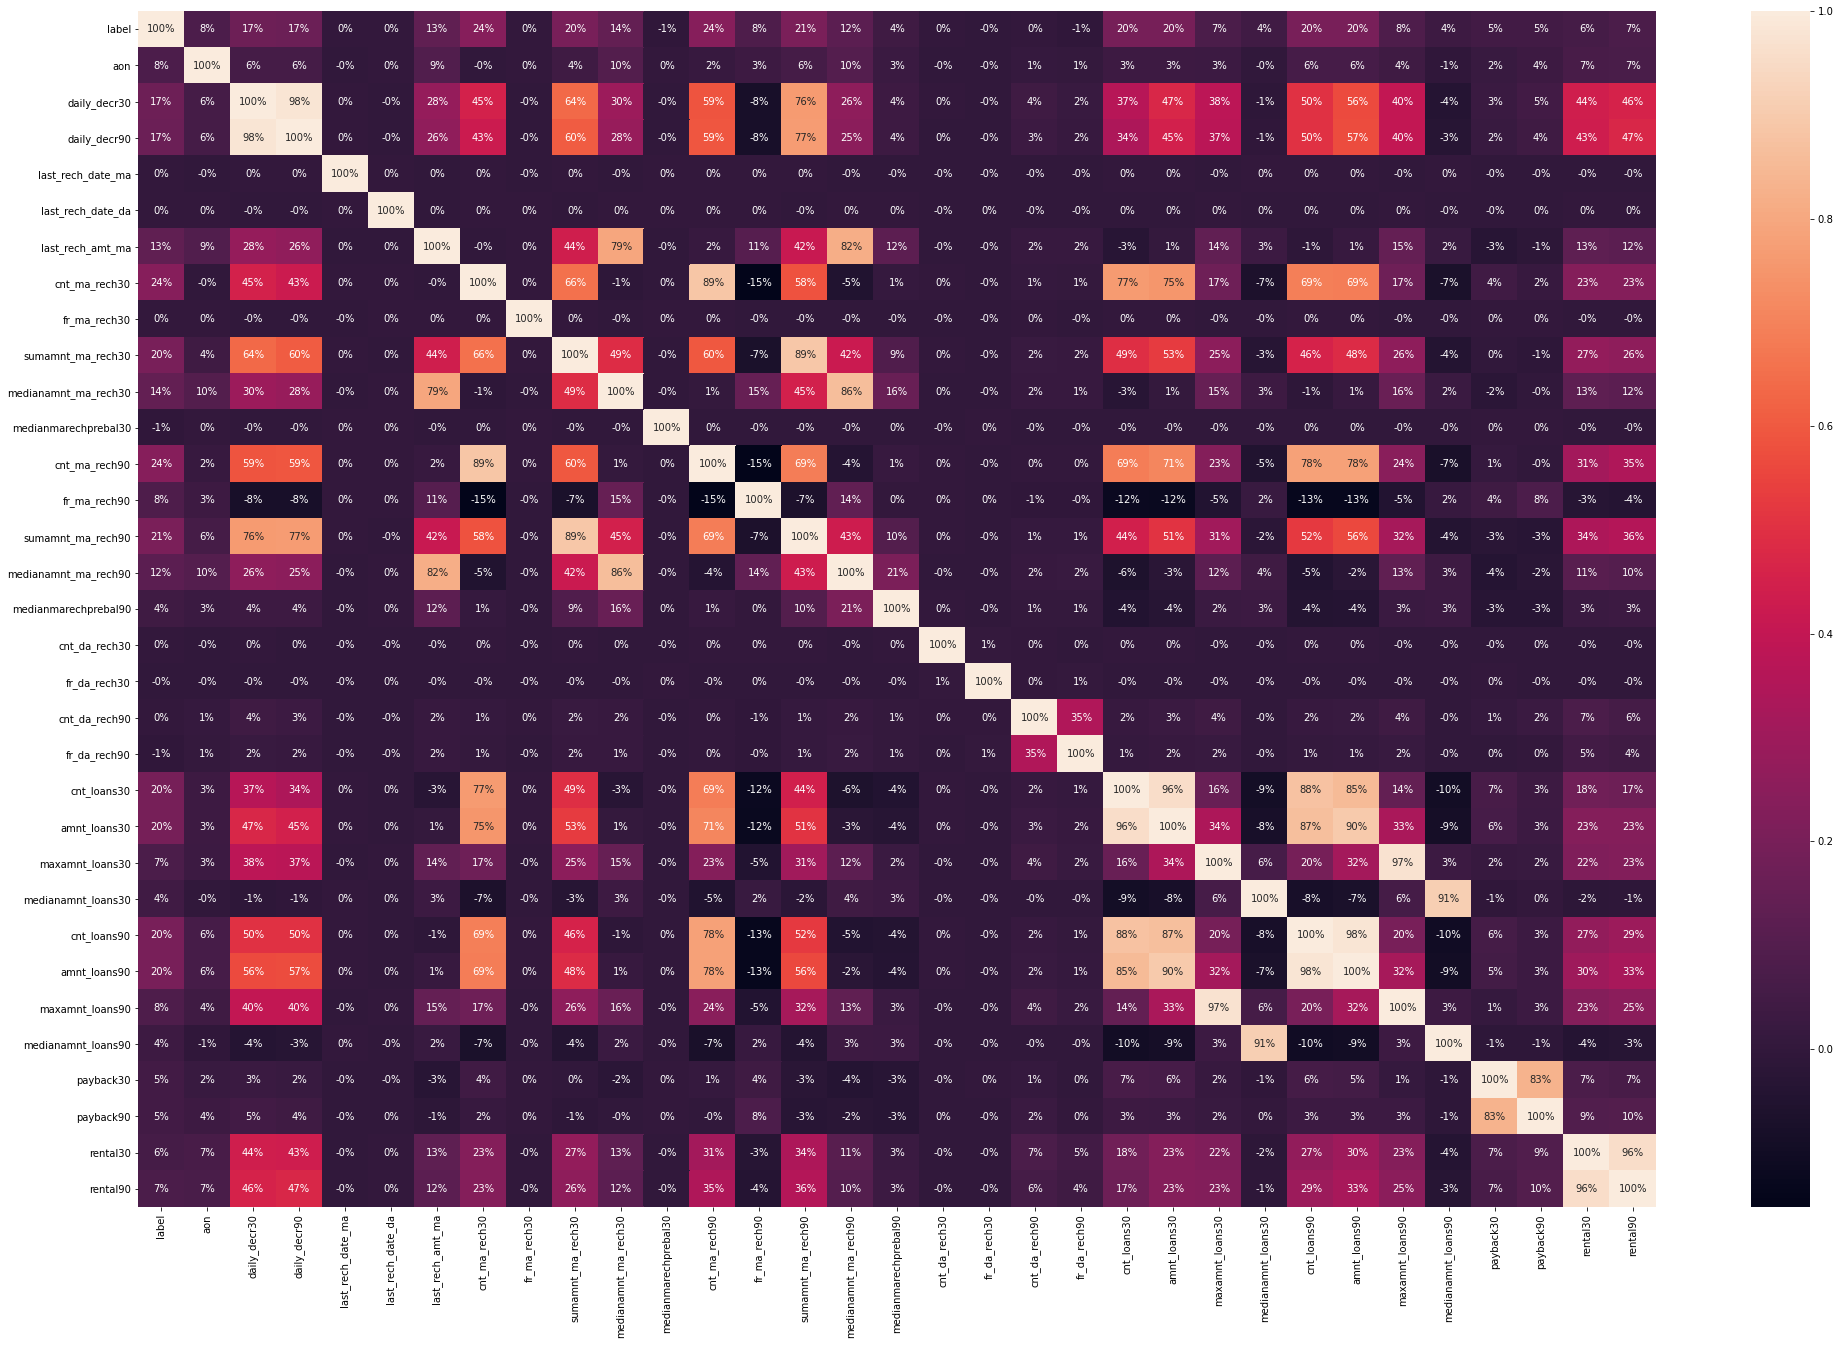

In [153]:
plt.figure(figsize=(34,22))
sns.heatmap(df.corr(),fmt='.0%',annot=True)

#### Correlation with target column

Text(0.5, 1.0, 'correlation with target variable')

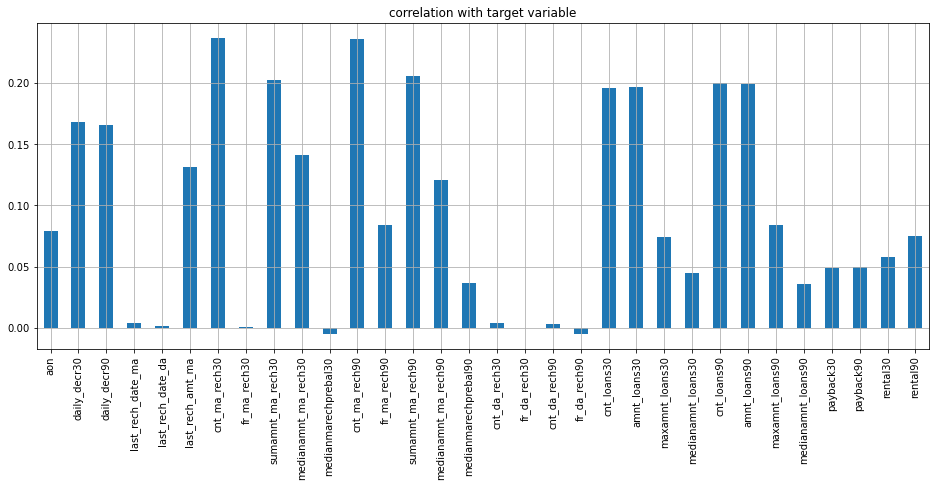

In [154]:
plt.figure(figsize=(16,6))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title('correlation with target variable')

In [155]:
df.columns  

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30',
       'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90',
       'payback30', 'payback90', 'rental30', 'rental90'],
      dtype='object')

### Observation

1.All features are positively correlated with label,except 'medianmarechprebal30' & 'fr_da_rech90'

2.'cnt_ma_rech30' & 'cnt_ma_rech90' are highly(positively
) correlated with target column

3.'last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30','fr_da_rech30','cnt_da_rech90','fr_da_rech90' is very very less correlated with atrget column .ie label

In [156]:
#dropping least correlated column
df.drop(['last_rech_date_ma','last_rech_date_da','fr_ma_rech30','medianmarechprebal30','fr_da_rech30','cnt_da_rech90','fr_da_rech90'],axis=1,inplace=True)

In [157]:
df.shape

(205436, 26)

# Data Visualization

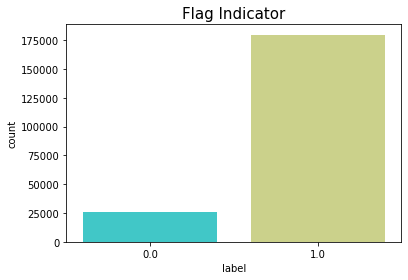

1.0    179812
0.0     25624
Name: label, dtype: int64


In [158]:
#Checking the number of Flag Indicator.

sns.countplot(x='label', data=df, palette='rainbow')
plt.title('Flag Indicator', fontsize=15)
plt.show()

print(df['label'].value_counts())

Observation



1.Out of total ,183431  user paid back the credit amount within 5 days of issuing the loan.


2.Out of total , 26162  user failed to pay back the credit amount within 5 days of issuing the loan.

  We also observe that the data is unbalanced

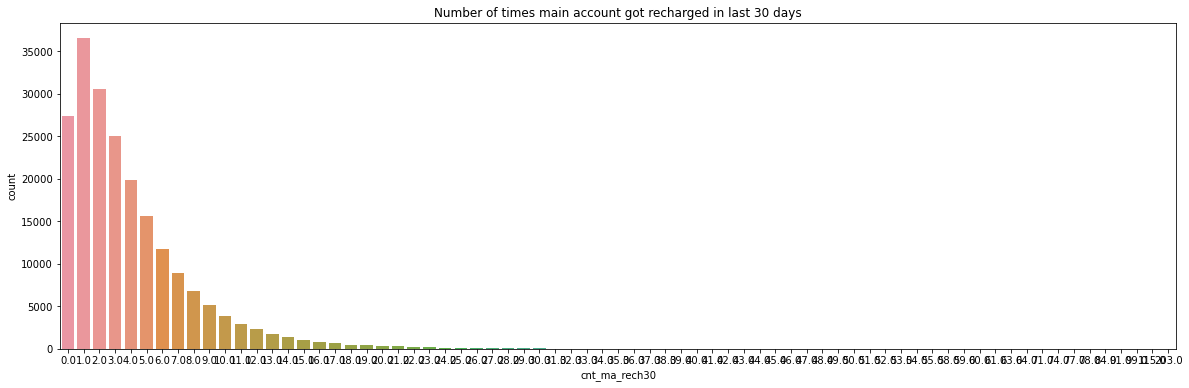

1.0     36517
2.0     30552
0.0     27428
3.0     25015
4.0     19834
        ...  
59.0        1
78.0        1
84.0        1
63.0        1
50.0        1
Name: cnt_ma_rech30, Length: 71, dtype: int64


In [159]:
#Checking the number of recharges in last 30 days.

plt.subplots(figsize=(20,6))
sns.countplot(x='cnt_ma_rech30', data=df)
plt.title('Number of times main account got recharged in last 30 days')
plt.show()

print(df['cnt_ma_rech30'].value_counts())

Observation:

1.Mostly main account got recharged only 1 time ,followed by 2 times.

2.We also observe that ,many user haven't recharged their phone in last 30 days,not even a single time

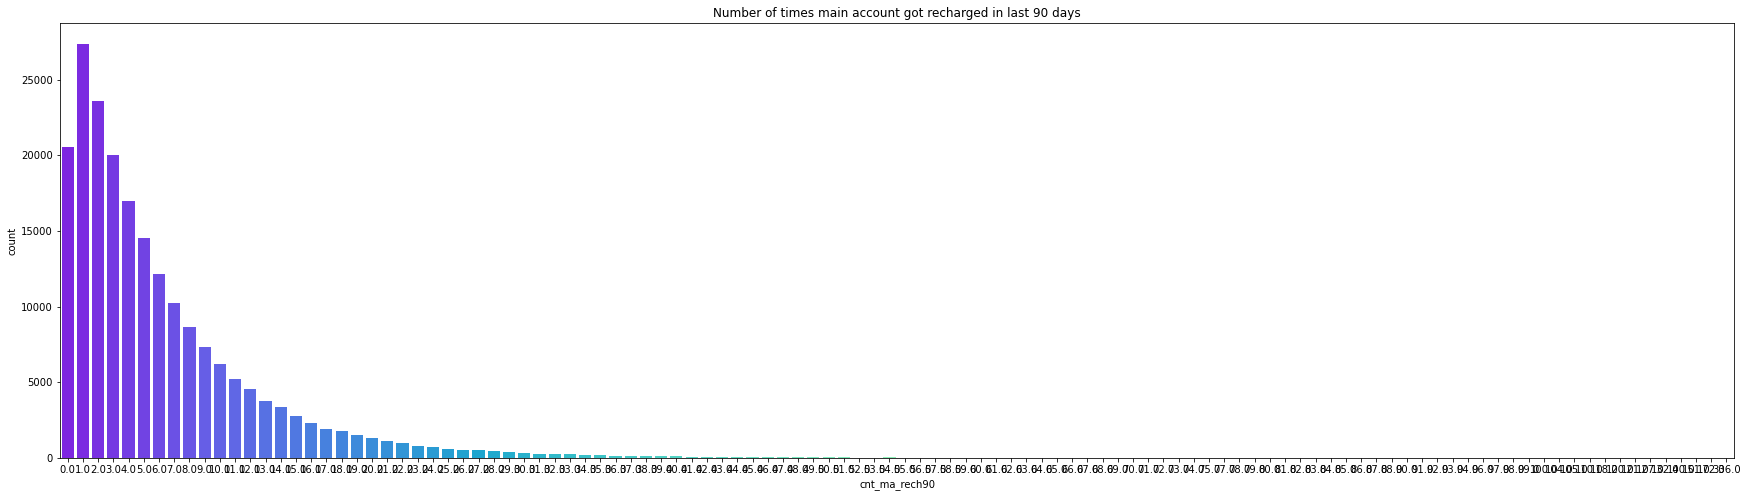

1.0      27368
2.0      23567
0.0      20537
3.0      20011
4.0      16991
         ...  
96.0         1
172.0        1
121.0        1
94.0         1
105.0        1
Name: cnt_ma_rech90, Length: 110, dtype: int64


In [160]:
#Checking the number of recharges in last 90 days.

plt.subplots(figsize=(30,8))
sns.countplot(x='cnt_ma_rech90', data=df, palette='rainbow')
plt.title('Number of times main account got recharged in last 90 days')
plt.show()

print(df['cnt_ma_rech90'].value_counts())

Observation:

The same trend as seen in cnt_ma_rech30 persists.

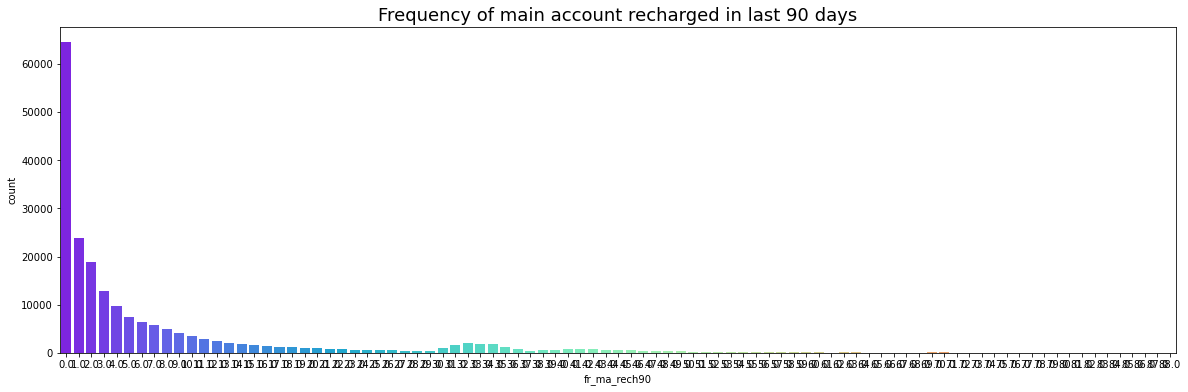

0.0     64475
1.0     23896
2.0     18931
3.0     12922
4.0      9807
        ...  
80.0        7
81.0        7
88.0        5
84.0        4
87.0        1
Name: fr_ma_rech90, Length: 89, dtype: int64


In [161]:
#Checking the Frequency of data account recharged in last 90 days

plt.subplots(figsize=(20,6))
sns.countplot(x='fr_ma_rech90', data=df, palette='rainbow')
plt.title('Frequency of main account recharged in last 90 days', fontsize=18)
plt.show()

print(df['fr_ma_rech90'].value_counts())

    We notice that main account has been recharged much less frequently

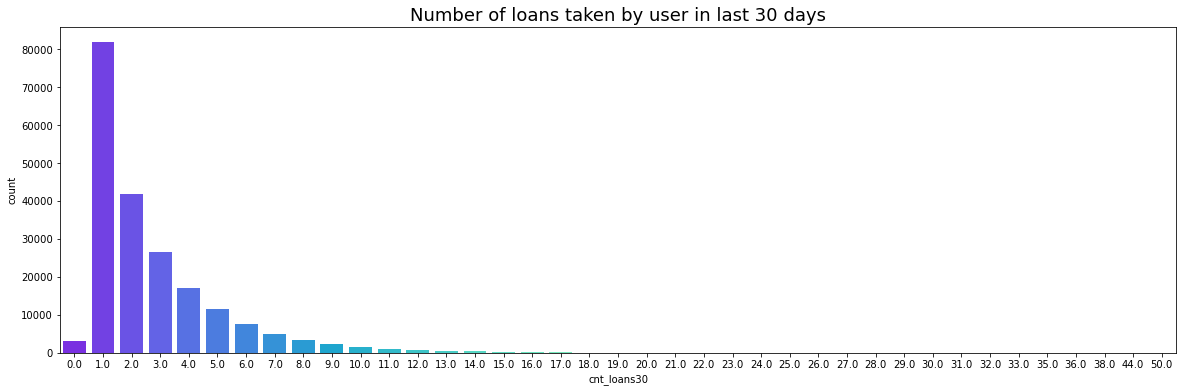

1.0     81815
2.0     41767
3.0     26534
4.0     17110
5.0     11469
6.0      7616
7.0      4955
8.0      3304
0.0      3191
9.0      2235
10.0     1540
11.0     1126
12.0      781
13.0      540
14.0      374
15.0      263
16.0      207
17.0      157
18.0       96
19.0       75
20.0       52
21.0       45
22.0       42
23.0       38
25.0       19
26.0       16
27.0       15
24.0       13
29.0        9
31.0        8
28.0        7
32.0        4
30.0        4
33.0        3
38.0        2
35.0        1
44.0        1
50.0        1
36.0        1
Name: cnt_loans30, dtype: int64


In [162]:
#Checking the Number of loans taken by user in last 30 days

plt.subplots(figsize=(20,6))
sns.countplot(x='cnt_loans30', data=df, palette='rainbow')
plt.title('Number of loans taken by user in last 30 days', fontsize=18)
plt.show()

print(df['cnt_loans30'].value_counts())

Observation:

Mostly,the user takes loan only 1 time

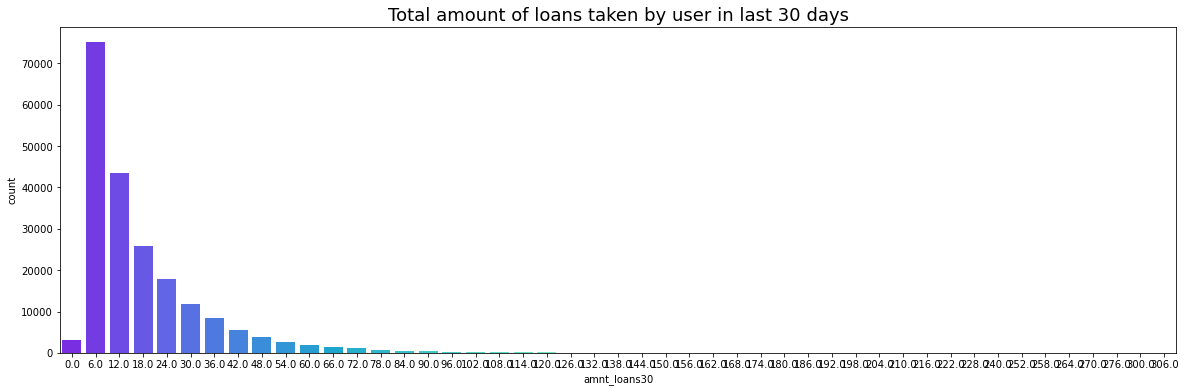

6.0      75120
12.0     43477
18.0     25880
24.0     17988
30.0     11794
36.0      8372
42.0      5481
48.0      3908
0.0       3191
54.0      2612
60.0      2002
66.0      1378
72.0      1084
78.0       732
84.0       570
90.0       386
96.0       324
102.0      244
108.0      177
114.0      133
120.0      116
132.0       92
126.0       80
138.0       64
156.0       33
144.0       30
150.0       30
162.0       28
168.0       20
174.0       16
186.0       14
180.0       13
192.0        7
198.0        5
210.0        4
252.0        4
228.0        4
216.0        4
264.0        3
222.0        3
276.0        3
258.0        3
204.0        2
240.0        2
306.0        1
270.0        1
300.0        1
Name: amnt_loans30, dtype: int64


In [163]:
#Checking the Number of Total amount of loans taken by user in last 30 days

plt.subplots(figsize=(20,6))
sns.countplot(x='amnt_loans30', data=df, palette='rainbow')
plt.title('Total amount of loans taken by user in last 30 days', fontsize=18)
plt.show()

print(df['amnt_loans30'].value_counts())

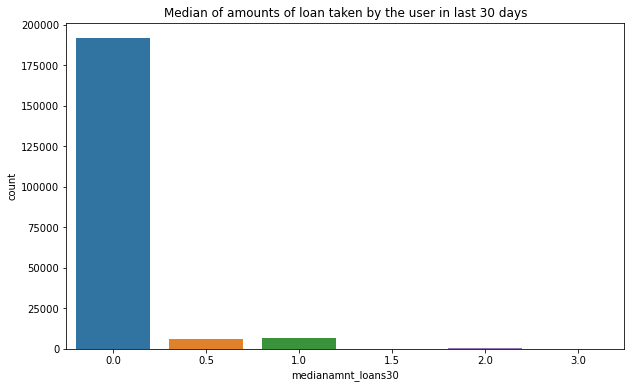

0.0    191605
1.0      6979
0.5      6400
2.0       411
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64


In [164]:
#Checking the Number of Median of amounts of loan taken by the user in last 30 days

plt.subplots(figsize=(10, 6))
sns.countplot(x='medianamnt_loans30', data=df)
plt.title('Median of amounts of loan taken by the user in last 30 days')
plt.show()

print(df['medianamnt_loans30'].value_counts())

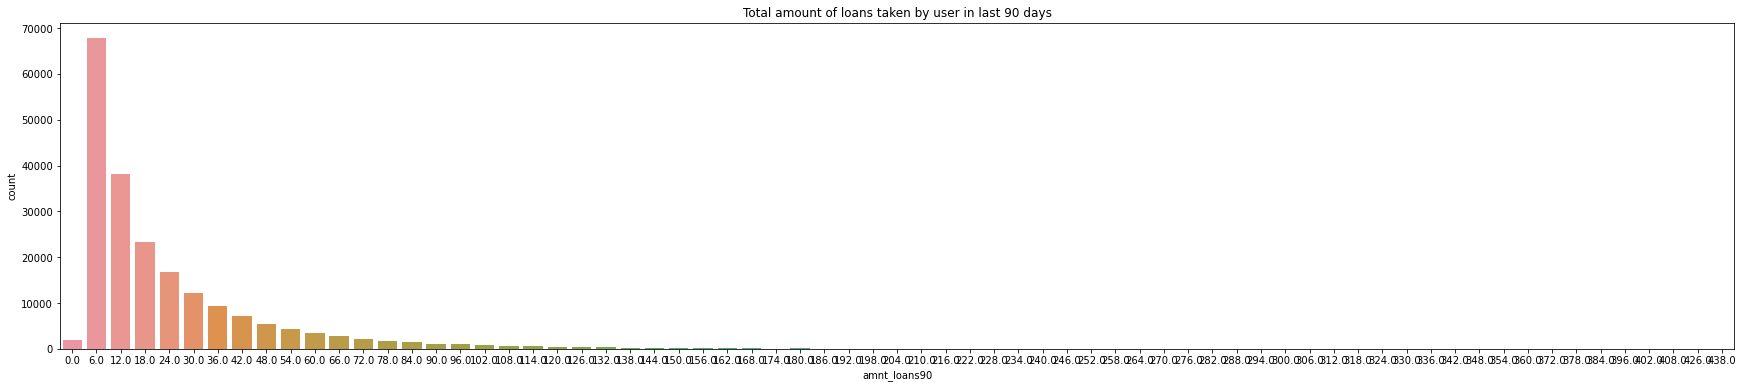

6.0      67777
12.0     38166
18.0     23363
24.0     16858
30.0     12248
         ...  
402.0        1
360.0        1
342.0        1
438.0        1
426.0        1
Name: amnt_loans90, Length: 69, dtype: int64


In [165]:
#Checking the Number of Total amount of loans taken by user in last 90 days

plt.subplots(figsize=(30, 6))
sns.countplot(x='amnt_loans90', data=df,)
plt.title('Total amount of loans taken by user in last 90 days')
plt.show()

print(df['amnt_loans90'].value_counts())

Mostly user have taken loan of 6 rs

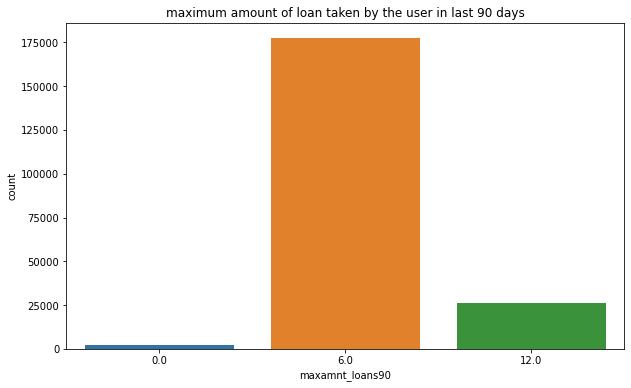

6.0     177340
12.0     26097
0.0       1999
Name: maxamnt_loans90, dtype: int64


In [166]:
#Checking the maximum amount of loan taken by the user in last 90 days
plt.subplots(figsize=(10, 6))
sns.countplot(x='maxamnt_loans90', data=df)
plt.title('maximum amount of loan taken by the user in last 90 days')
plt.show()

print(df['maxamnt_loans90'].value_counts())

# Bivariate Analysis

In [167]:
# Show the barplot for an individual column grouped by the target column


<AxesSubplot:xlabel='label', ylabel='daily_decr30'>

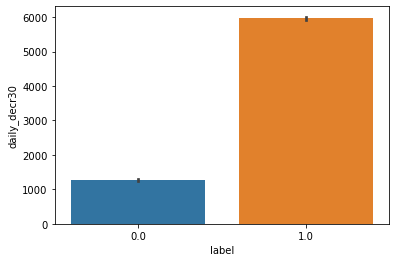

In [168]:
sns.barplot(y='daily_decr30',x='label', data=df)


We observe that:
   

           The clients who have been repaying their loans spend more per day than those who don't repay their loans

Clients who do repay their debt have a very large spread in their data though.

<AxesSubplot:xlabel='label', ylabel='daily_decr90'>

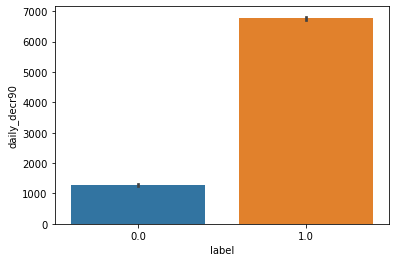

In [169]:
sns.barplot(x='label',y='daily_decr90',data=df)

The same trend as seen in daily_decr_30 persists. They are practically identical.

<AxesSubplot:xlabel='label', ylabel='rental30'>

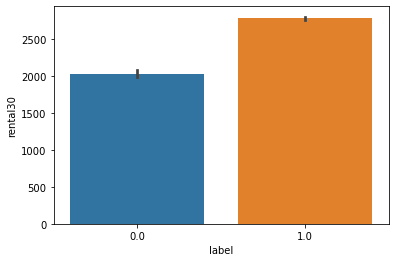

In [170]:
sns.barplot(x='label',y='rental30',data=df)

We observe that ,those who repay their loan have high average main account balance over last 30 days,than those whose who do not repay their loan

<AxesSubplot:xlabel='label', ylabel='rental90'>

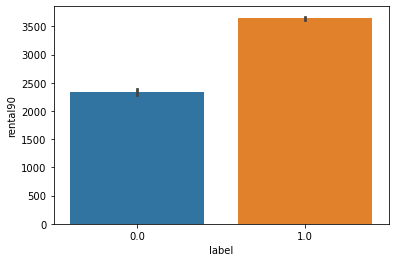

In [171]:
sns.barplot(x='label',y='rental90',data=df)

<AxesSubplot:xlabel='label', ylabel='last_rech_amt_ma'>

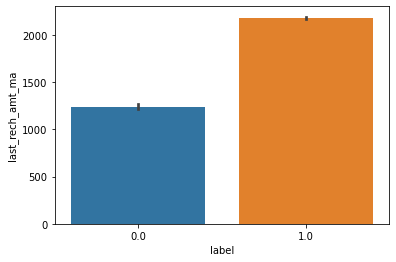

In [172]:
sns.barplot(x='label',y='last_rech_amt_ma',data=df)

<AxesSubplot:xlabel='label', ylabel='cnt_ma_rech30'>

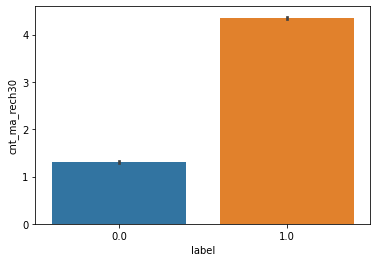

In [173]:
sns.barplot(x='label',y='cnt_ma_rech30',data=df)

In this case the clients who repay their loans also recharged their main accounts most often.

<AxesSubplot:xlabel='label', ylabel='sumamnt_ma_rech30'>

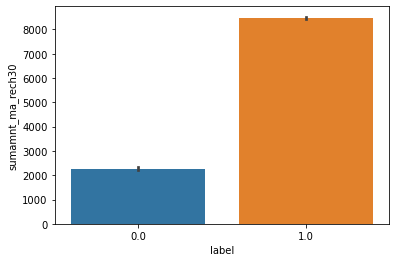

In [174]:
sns.barplot(x='label',y='sumamnt_ma_rech30',data=df)

The clients who repay their loans are the ones recharging the most 

<AxesSubplot:xlabel='label', ylabel='medianamnt_ma_rech30'>

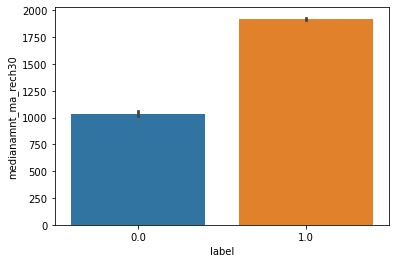

In [175]:
sns.barplot(x='label',y='medianamnt_ma_rech30',data=df)

<AxesSubplot:xlabel='label', ylabel='cnt_loans30'>

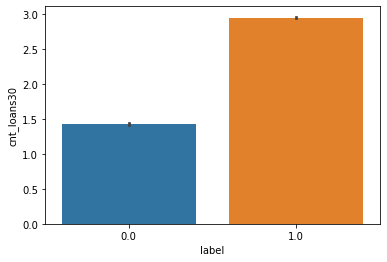

In [176]:
sns.barplot(x='label',y='cnt_loans30',data=df)

<AxesSubplot:xlabel='label', ylabel='amnt_loans30'>

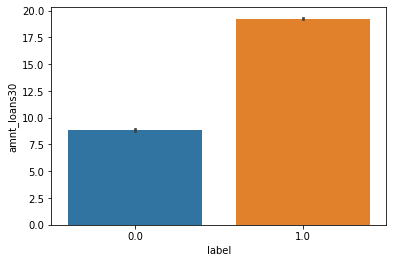

In [177]:
sns.barplot(x='label',y='amnt_loans30',data=df)

<AxesSubplot:xlabel='label', ylabel='cnt_loans90'>

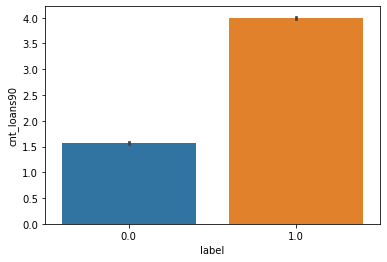

In [178]:
sns.barplot(x='label',y='cnt_loans90',data=df)

From all the bar graph ,we observe that;

   Most of the loans are taken out by clients who repay them.

<AxesSubplot:xlabel='label', ylabel='fr_ma_rech90'>

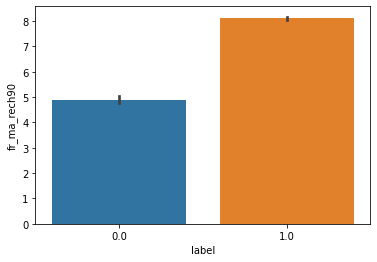

In [179]:
sns.barplot(x='label',y='fr_ma_rech90',data=df
           )

As we can see above that people who are not recharging their balance more frequently are the major defaulters in the paying back

<AxesSubplot:xlabel='label', ylabel='payback30'>

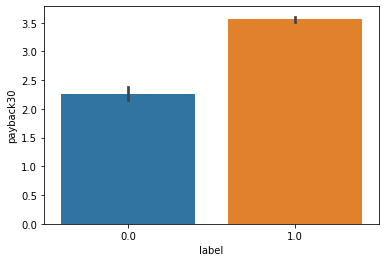

In [180]:
sns.barplot(x='label',y='payback30',data=df)

As expected clients who repayed their loans are most common

### Check eveness of dataset

In [181]:
df['label'].value_counts()

1.0    179812
0.0     25624
Name: label, dtype: int64

In [182]:
df['label'].value_counts(normalize=True)*100

1.0    87.527016
0.0    12.472984
Name: label, dtype: float64

We notice that the data is not distributed evenly over the target column. Therefore the model will have difficulty making accurate predictions.


We will Stratify data over target column during train-test split to minimise this effect.

In [183]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
last_rech_amt_ma        0
cnt_ma_rech30           0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
rental30                0
rental90                0
dtype: int64

# Plotting Outliers

label                      AxesSubplot(0.125,0.772143;0.133621x0.107857)
aon                     AxesSubplot(0.285345,0.772143;0.133621x0.107857)
daily_decr30             AxesSubplot(0.44569,0.772143;0.133621x0.107857)
daily_decr90            AxesSubplot(0.606034,0.772143;0.133621x0.107857)
last_rech_amt_ma        AxesSubplot(0.766379,0.772143;0.133621x0.107857)
cnt_ma_rech30              AxesSubplot(0.125,0.642714;0.133621x0.107857)
sumamnt_ma_rech30       AxesSubplot(0.285345,0.642714;0.133621x0.107857)
medianamnt_ma_rech30     AxesSubplot(0.44569,0.642714;0.133621x0.107857)
cnt_ma_rech90           AxesSubplot(0.606034,0.642714;0.133621x0.107857)
fr_ma_rech90            AxesSubplot(0.766379,0.642714;0.133621x0.107857)
sumamnt_ma_rech90          AxesSubplot(0.125,0.513286;0.133621x0.107857)
medianamnt_ma_rech90    AxesSubplot(0.285345,0.513286;0.133621x0.107857)
medianmarechprebal90     AxesSubplot(0.44569,0.513286;0.133621x0.107857)
cnt_da_rech30           AxesSubplot(0.606034,0.5132

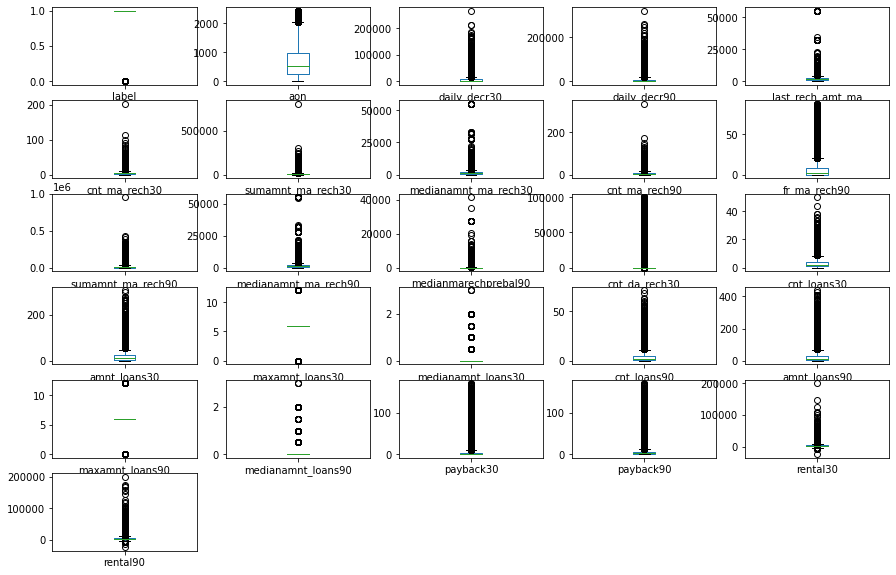

In [184]:
df.plot(kind='box',subplots=True,layout=(6,5),figsize=(15,10))

In [185]:
#removing outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<5).all(axis=1)]
print(df_new.shape)

(205436, 26)
(195859, 26)


When we apply z-score of 3 , 20% of the data is lost  (due to the wide spread of most of the data). We compromised by enlarging the z-score cut-off to 5 resulting in a loss of few data.


In [186]:
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
last_rech_amt_ma        0
cnt_ma_rech30           0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
rental30                0
rental90                0
dtype: int64

# Checking Skewness

In [187]:
df.skew()

label                   -2.271543
aon                      0.950868
daily_decr30             3.939749
daily_decr90             4.259120
last_rech_amt_ma         3.770974
cnt_ma_rech30            3.292257
sumamnt_ma_rech30        6.423924
medianamnt_ma_rech30     3.469951
cnt_ma_rech90            3.436827
fr_ma_rech90             2.288911
sumamnt_ma_rech90        4.927298
medianamnt_ma_rech90     3.718198
medianmarechprebal90    45.192590
cnt_da_rech30           17.819792
cnt_loans30              2.705224
amnt_loans30             2.969823
maxamnt_loans30          1.429042
medianamnt_loans30       4.560178
cnt_loans90              2.997570
amnt_loans90             3.153537
maxamnt_loans90          1.678345
medianamnt_loans90       4.907247
payback30                8.299824
payback90                6.886398
rental30                 4.546156
rental90                 4.453162
dtype: float64

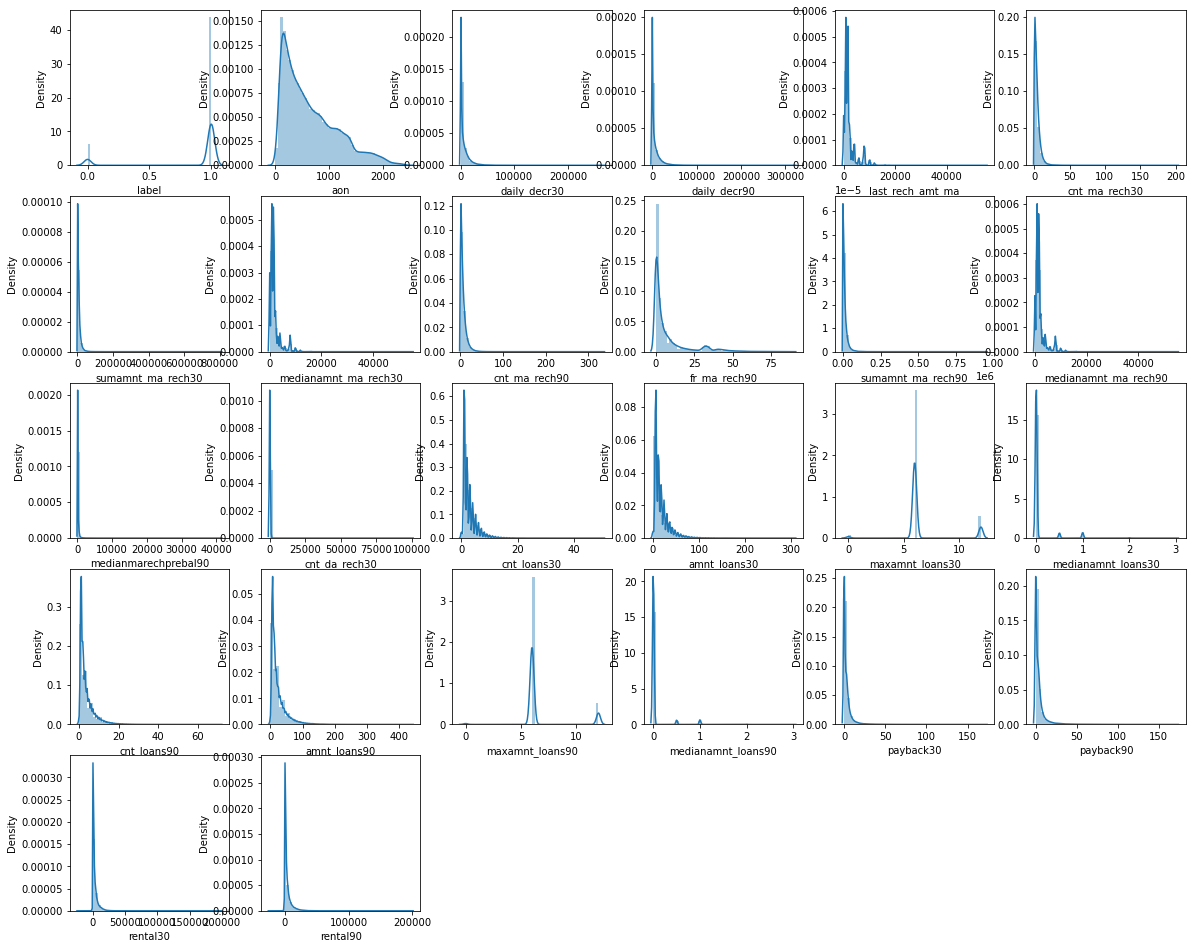

In [188]:
col=df.columns.values
nrows=6
ncol=6

plt.figure(figsize=(20,20))
for i in range(0,len(col)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[col[i]])

We observe that skewness is present in the dataset,which needs to be removed

#### Removing skewness

In [189]:
#treating skewness via squareroot method and cube root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [190]:
df.skew()

label                   -2.271543
aon                      0.307552
daily_decr30             1.129445
daily_decr90             1.234495
last_rech_amt_ma         0.802090
cnt_ma_rech30            0.361829
sumamnt_ma_rech30        0.815695
medianamnt_ma_rech30     0.627816
cnt_ma_rech90            0.618842
fr_ma_rech90             1.039642
sumamnt_ma_rech90        0.984507
medianamnt_ma_rech90     0.766343
medianmarechprebal90     4.176550
cnt_da_rech30           15.567555
cnt_loans30              1.075806
amnt_loans30             1.150681
maxamnt_loans30         -6.656341
medianamnt_loans30       3.707501
cnt_loans90              1.306856
amnt_loans90             1.348399
maxamnt_loans90         -7.762517
medianamnt_loans90       4.044824
payback30                1.922543
payback90                1.783926
rental30                 1.271884
rental90                 1.333229
dtype: float64

In [191]:
df.isnull().sum()

label                      0
aon                        0
daily_decr30               0
daily_decr90               0
last_rech_amt_ma           0
cnt_ma_rech30              0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90       0
cnt_da_rech30              0
cnt_loans30                0
amnt_loans30               0
maxamnt_loans30            0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
maxamnt_loans90            0
medianamnt_loans90         0
payback30                  0
payback90                  0
rental30                5514
rental90                5810
dtype: int64

In [192]:
#imputing null values
for col in ['rental30','rental90']:
    df[col].fillna(df[col].mode()[0],inplace=True)

## spliting the data into input(x) and output(y) variable

In [193]:

x=df.drop('label',axis=1)
x.head()

,aon,daily_decr30,daily_decr90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
0,16.492423,55.272507,55.363797,39.230090,1.414214,55.479726,39.230090,1.414214,4.582576,55.479726,...,1.348006,0.0,1.414214,3.464102,1.348006,0.0,5.385165,5.385165,14.836779,16.128546
1,26.683328,110.099955,110.112443,76.072334,1.000000,76.072334,76.072334,1.000000,0.000000,76.072334,...,1.513086,0.0,1.000000,3.464102,1.513086,0.0,0.000000,0.000000,60.755740,60.755740
2,23.130067,37.389838,37.389838,39.230090,1.000000,39.230090,39.230090,1.000000,0.000000,39.230090,...,1.348006,0.0,1.000000,2.449490,1.348006,0.0,0.000000,0.000000,30.002167,30.002167
3,15.524175,4.607385,4.607385,30.773365,0.000000,0.000000,0.000000,1.000000,0.000000,30.773365,...,1.348006,0.0,1.414214,3.464102,1.348006,0.0,0.000000,0.000000,12.626163,12.626163
4,30.773365,12.272707,12.272707,48.052055,2.645751,141.523850,48.052055,2.828427,1.414214,153.284050,...,1.348006,0.0,2.645751,6.480741,1.348006,0.0,1.527525,1.527525,33.149661,33.149661


In [194]:
y=df['label']
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

In [195]:
# checking the shape of input & target variable
print(x.shape)
print(y.shape)

(205436, 25)
(205436,)


In [196]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [197]:
# PCA is required for the analysis to reduce curse of Dimensionality & at the same time minimizing information loss 
from sklearn.decomposition import PCA
for i in range(5,15):
    pca = PCA(n_components=i)
    x_pca=pca.fit_transform(x)
    print(i," variance :{}".format(np.sum(pca.explained_variance_ratio_)))

5  variance :0.6990027623629237
6  variance :0.7589011111867625
7  variance :0.798902886619402
8  variance :0.8383201999912604
9  variance :0.871967893152306
10  variance :0.9044282335377426
11  variance :0.9327095395470014
12  variance :0.9530835087138813
13  variance :0.9626889706148987
14  variance :0.970840601405708


In [198]:
#lets use n=14
pca = PCA(n_components=14)
x=pca.fit_transform(x)

In [199]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=42, stratify=y)

In [200]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (164348, 14)
x_test_shape: (41088, 14)
y_train_shape: (164348,)
y_test_shape: (41088,)


In [201]:
#Importing all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Importing boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#Importing error metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

In [202]:
max_accuracy_score=0
for r_state in range(30,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=.20,stratify=y)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    lg_pred=lg.predict(x_test)
    accuracy_scr=accuracy_score(y_test,lg_pred)
    if accuracy_scr>max_accuracy_score:
        max_accuracy_score=accuracy_scr
        final_r_state=r_state
        
print('max accuracy score corresponding to ',final_r_state,'is',max_accuracy_score)


max accuracy score corresponding to  68 is 0.8831532320872274


In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=68,stratify=y)

In [204]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

accuracy_score: 0.8831532320872274
[[  953  4172]
 [  629 35334]]
              precision    recall  f1-score   support

         0.0       0.60      0.19      0.28      5125
         1.0       0.89      0.98      0.94     35963

    accuracy                           0.88     41088
   macro avg       0.75      0.58      0.61     41088
weighted avg       0.86      0.88      0.86     41088



In [205]:
#model
lg=LogisticRegression(random_state=68)
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()

In [206]:
#all Algorithm by using for loop
model=[lg,gnb,dtc,rfc,ad]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is:',accuracy_score(y_test,predm))
    print('\n')
    print(confusion_matrix(y_test,predm))
    print('\n')
    print(classification_report(y_test,predm))
    print('*************************************************************************************')
    print('\n')

Accuracy score of  LogisticRegression(random_state=68) is: 0.8831532320872274


[[  953  4172]
 [  629 35334]]


              precision    recall  f1-score   support

         0.0       0.60      0.19      0.28      5125
         1.0       0.89      0.98      0.94     35963

    accuracy                           0.88     41088
   macro avg       0.75      0.58      0.61     41088
weighted avg       0.86      0.88      0.86     41088

*************************************************************************************


Accuracy score of  GaussianNB() is: 0.8184384735202492


[[ 3087  2038]
 [ 5422 30541]]


              precision    recall  f1-score   support

         0.0       0.36      0.60      0.45      5125
         1.0       0.94      0.85      0.89     35963

    accuracy                           0.82     41088
   macro avg       0.65      0.73      0.67     41088
weighted avg       0.87      0.82      0.84     41088

*******************************************************

In [207]:
#cross validate the models
models=[lg,gnb,dtc,rfc,ad]
for m in models:
    score=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print('Model:',m)
    print('\n')
    print('score:',score)
    print('mean_score:',score.mean())
    print('standard deviation:',score.std())
    print('*****************************************************************************************')
    print('\n')

Model: LogisticRegression(random_state=68)


score: [0.8815956  0.88091124 0.8805705  0.8812033  0.88373451]
mean_score: 0.8816030296901711
standard deviation: 0.001117834314525391
*****************************************************************************************


Model: GaussianNB()


score: [0.81556659 0.81704675 0.81755787 0.82060019 0.82021077]
mean_score: 0.8181964340711719
standard deviation: 0.0019225618354681857
*****************************************************************************************


Model: DecisionTreeClassifier()


score: [0.8510514  0.85009857 0.85004989 0.85090175 0.84931974]
mean_score: 0.8502842697135256
standard deviation: 0.0006307944727100639
*****************************************************************************************


Model: RandomForestClassifier()


score: [0.90264798 0.90069852 0.90206148 0.9020128  0.90228053]
mean_score: 0.9019402601894756
standard deviation: 0.0006600791267518199
******************************************

In [211]:
from sklearn.metrics import roc_auc_score
print('LG AUC score',roc_auc_score(y_test,lgpred_prob))
print('Random forest classifier',roc_auc_score(y_test,rfcpred_prob))
print('DTC AUC SCORE',roc_auc_score(y_test,dtcpred_prob))
print('GNB auc score',roc_auc_score(y_test,gnbpred_prob))
print('Adaboost classifier',roc_auc_score(y_test,adpred_prob))


LG AUC score 0.8373079757447186
Random forest classifier 0.8604796799963106
DTC AUC SCORE 0.6776514832656599
GNB auc score 0.7808172464518072
Adaboost classifier 0.8390883665664507


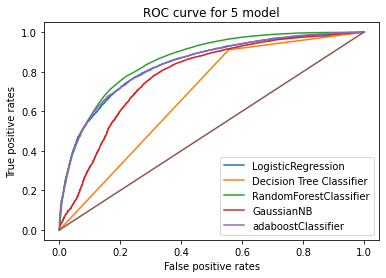

LG AUC score 0.8373079757447186
Random forest classifier 0.8604796799963106
DTC AUC SCORE 0.6776514832656599
GNB auc score 0.7808172464518072
Adaboost classifier 0.8390883665664507


In [212]:
lgpred_prob=lg.predict_proba(x_test)[:,1]
dtcpred_prob=dtc.predict_proba(x_test)[:,1]
rfcpred_prob=rfc.predict_proba(x_test)[:,1]
gnbpred_prob=gnb.predict_proba(x_test)[:,1]
adpred_prob=ad.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
lg_tpr,lg_fpr,lg_threshold=roc_curve(y_test,lgpred_prob)
dtc_tpr,dtc_fpr,dtc_thresholds=roc_curve(y_test,dtcpred_prob)
rfc_tpr,rfc_fpr,rfc_thresholds=roc_curve(y_test,rfcpred_prob)
gnb_tpr,gnb_fpr,gnb_thresholds=roc_curve(y_test,gnbpred_prob)
ad_tpr,ad_fpr,ad_threshold=roc_curve(y_test,adpred_prob)



plt.plot(lg_tpr,lg_fpr,label='LogisticRegression')
plt.plot(dtc_tpr,dtc_fpr,label ='Decision Tree Classifier')
plt.plot(rfc_tpr,rfc_fpr,label='RandomForestClassifier')
plt.plot(gnb_tpr,gnb_fpr,label='GaussianNB')
plt.plot(ad_tpr,ad_fpr,label='adaboostClassifier')


plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve for 5 model')
plt.legend(loc='best')
plt.plot([0,1],[0,1])
plt.show()

from sklearn.metrics import roc_auc_score
print('LG AUC score',roc_auc_score(y_test,lgpred_prob))
print('Random forest classifier',roc_auc_score(y_test,rfcpred_prob))
print('DTC AUC SCORE',roc_auc_score(y_test,dtcpred_prob))
print('GNB auc score',roc_auc_score(y_test,gnbpred_prob))
print('Adaboost classifier',roc_auc_score(y_test,adpred_prob))


### We know that higher the area under the curve ,better the model is working

### From above we see that,Random Forest Classifier gives the best accuracy score & best auc score.


In [214]:
#save the model as a pickel in a file
import joblib
joblib.dump(rfc,'Micro-Credit Model.pkl')

['Micro-Credit Model.pkl']